In [2]:
%load_ext autoreload

In [51]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules")
METRIC_PATH = os.path.join(BASE_PATH, "metrics")

In [10]:
sys.path.append(MODULE_PATH)

In [11]:
from active_learning import Metrics

In [117]:
mc_comparison_metric_path = os.path.join(METRIC_PATH, "y.gal_20e_50step")

In [118]:
metrics_loader = Metrics(mc_comparison_metric_path)

In [119]:
metric_files = os.listdir(mc_comparison_metric_path)

In [120]:
def get_method_name(filename):
    method = "_".join(filename.split("_")[2:])
    
    if method == "bald":
        return "BALD"
    
    if method == "std_mean":
        return "Mean STD"
    
    if method == "max_var_ratio":
        return "Var. Ratio"
    
    if method == "max_entropy":
        return "Max. Entropy"

    return "Random"

In [121]:
results = {}
method_names = {}
for file in metric_files:
    name, ext = file.split(".")
    method_name = get_method_name(name)
    method_names[name] = method_name
    results[name] = metrics_loader.read(file)

In [122]:
types = {"labeled_size": int, "loss": float, "accuracy": float, "time": float}
frames = []
for i, k in enumerate(results):
    df = pd.DataFrame(results[k])
    method_name = method_names[k]
    df.insert(0, "Method", method_name)
    df = df.astype(types)
    frames.append(df)

In [123]:
combined = pd.concat(frames)

In [124]:
combined["time"] = combined["time"]/60

In [125]:
total_minutes = np.sum(combined["time"])

In [126]:
hours = np.floor(np.sum(combined["time"])/60)

In [127]:
minutes = np.floor(total_minutes) - (hours*60)

In [128]:
print("Total Time: %.0f:%.0f H:M" % (hours, minutes))

Total Time: 3:6 H:M


Text(0, 0.5, 'Time in minutes')

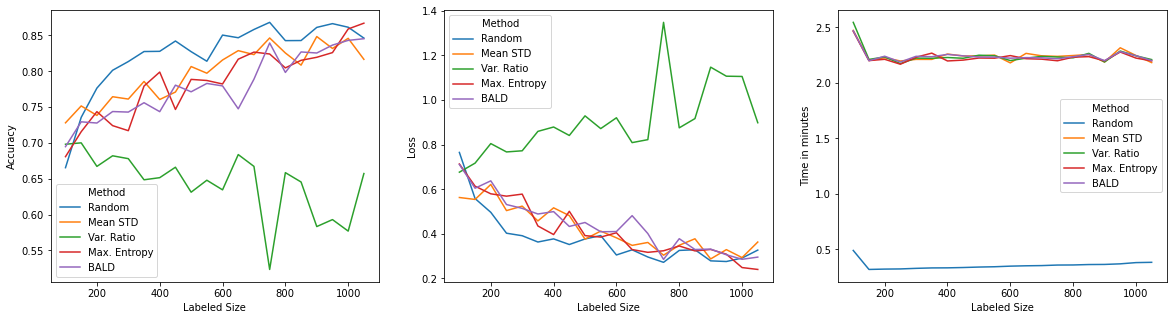

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))


sns.lineplot(ax=axes[0], data=combined, x="labeled_size", y="accuracy", hue="Method")
axes[0].set_xlabel("Labeled Size")
axes[0].set_ylabel("Accuracy")

sns.lineplot(ax=axes[1], data=combined, x="labeled_size", y="loss", hue="Method")
axes[1].set_xlabel("Labeled Size")
axes[1].set_ylabel("Loss")

sns.lineplot(ax=axes[2], data=combined, x="labeled_size", y="time", hue="Method")
axes[2].set_xlabel("Labeled Size")
axes[2].set_ylabel("Time in minutes")